# Kütüphanelerin Çalışmaya Dahil Edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx.xlsx")  #excel'den veri çekme işlemi gerçekleştirildi.

In [3]:
dataFrame.head()  #özet görmek için ilk 5 veri istenir.

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


##  Veriyi Anlamak

In [4]:
dataFrame.describe() # veri özelliklerinin görülmesi için çağrılır.

#count: veri sayısı 13.119
#mean: ortalama 2017 yılında 24.698 pound satış fiyatı
#std: standart sapmalar


,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()  #kolonda kaç tane non veri var olduğu bilgisini verir. (eksik veri yokmuş)

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
#sbn.pairplot(dataFrame)

C:\Users\fzeli\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

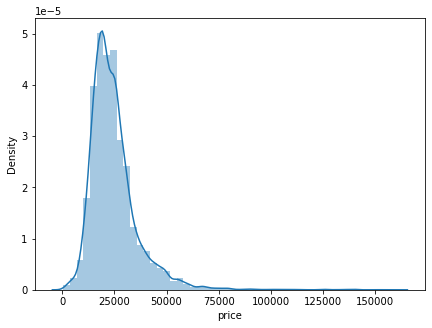

In [7]:
plt.figure(figsize = (7,5))

sbn.distplot(dataFrame["price"])  #sbn.distplot: veriler nasıl bir dağılım gösterir?

C:\Users\fzeli\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

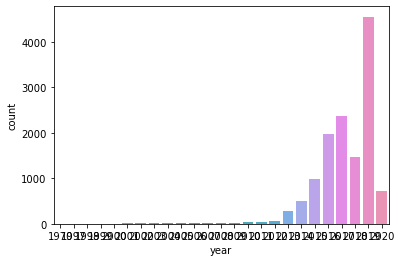

In [8]:
sbn.countplot(dataFrame["year"])   # yıllara göre kaç tane araba olduğunu gösterir.

In [9]:
dataFrame.corr()  # verilerin birbiri arasındaki ilişkisi: correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
dataFrame.corr()["price"].sort_values()  #sort_values() :değerleri küçükten büyüğe sıralar.

#corr()["price"]: fiyatın nelere bağlı değiştiğini görmek  

# fiyatı en çok etkileyen parametrenin yıl olduğunu gözlemliyoruz !!

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

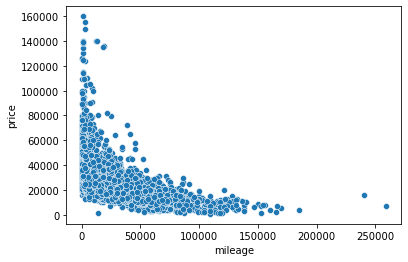

In [11]:
sbn.scatterplot(x = "mileage", y = "price", data = dataFrame  )  #veriler için nokta dağılım 

#  Burada araba kullanımı (kilometre) arttıkça fiyatlar düşer!

<AxesSubplot:xlabel='year', ylabel='price'>

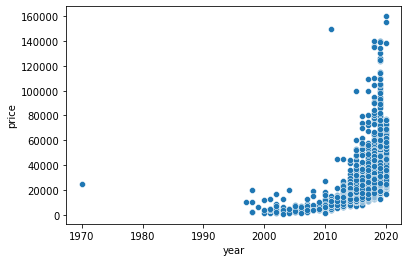

In [12]:
sbn.scatterplot(x = "year", y = "price", data = dataFrame  ) 

# yeni modeller daha pahalı çıkarımı yapılabilir !!
# Outliers değerler => Koleksiyon arabalar için 

In [13]:
dataFrame.sort_values("price", ascending = False).head(10)

#ascending(yükselen) = False : en yüksek fiyat en yukarıda gelecek şekilde 10 veri görüntülenir.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [14]:
dataFrame.sort_values("price", ascending = True).head(20)

#ascending(yükselen) = True : en düşük fiyat en yukarıda gelecek.

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [15]:
len(dataFrame) # verinin boyutu kontrol edildi.

13119

In [16]:
len(dataFrame) * 0.01   # 13119 veriden en yüksek 131 arabayı(%10'luk kısım) veri setinden atabiliriz.

131.19

# Veri Temizliği

In [17]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price", ascending = False).iloc[131:] 

# sınırdaki 131 değeri almadık.

In [18]:
yuzdeDoksanDokuzDf.describe() #kalan verilerin tablosu

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\fzeli\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

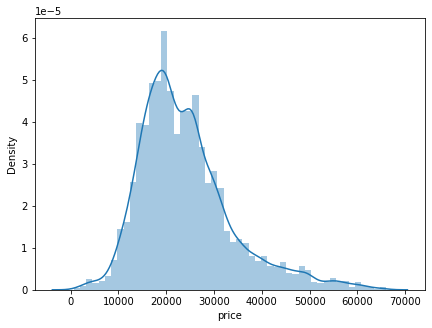

In [19]:
plt.figure(figsize = (7,5))
sbn.distplot(yuzdeDoksanDokuzDf["price"])

In [20]:
dataFrame.groupby("year").mean()["price"]   # yıllara göre ortalama fiyat değerlerini görürüz.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [21]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]  #1970'de anlamsız veri olduğu gözlemlenir.(koleksiyon araba)

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [22]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]   #1970 verileri çıkarıldı

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [23]:
dataFrame = yuzdeDoksanDokuzDf

In [24]:
dataFrame.describe()  # %1 'i atılmış haliyle çalışacağız.

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [25]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [26]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [27]:
dataFrame.head() # datasetten özet görüntülendi.

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [28]:
dataFrame = dataFrame.drop("transmission",axis=1) #transmission kolonunun düşürülmesi sağlandı.Çalışmada kullanılmayacak

In [29]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [30]:
type(dataFrame["price"]) # veri tipi sorgulandı.

pandas.core.series.Series

# Model Oluşturmak

In [31]:
y = dataFrame["price"].values  #seriyi array'e çevirdik. (ulaşmak istediğimiz değer)

x = dataFrame.drop("price",axis=1).values  # fiyatlar düştükten sonra kalan veriler özellikler olarak alınır.

In [32]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [33]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [34]:
from sklearn.model_selection import train_test_split #x ve y'leri train-test olarak ayırır.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =10)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9090, 5), (3897, 5), (9090,), (3897,))

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
x_train = scaler.fit_transform(x_train)  #scaler ve fit aynı adımda yapıldı.

In [40]:
x_test = scaler.fit_transform(x_test)  # ulaşmak istediğimiz değeri: label'ları scale etmeyiz.


In [41]:
from tensorflow.keras.models import Sequential   #modeli oluşturmak için
from tensorflow.keras.layers import Dense        #katmanları oluşturmak için

In [42]:
x_train.shape #9090 veri 5 özellik barındırır.

(9090, 5)

In [43]:
model = Sequential()   #model oluşturma

model.add(Dense(12, activation="relu"))    # 5 özellik için katman eklememe
model.add(Dense(12, activation="relu")) 
model.add(Dense(12, activation="relu")) 
model.add(Dense(12, activation="relu")) 

model.add(Dense(1))  #çıkış katmanına aktivasyon eklemeye gerek yok.

model.compile(optimizer="adam", loss="mse")

In [44]:
model.fit(x = x_train, y= y_train, validation_data=(x_test,y_test),batch_size=250,epochs=300)

#validation: doğrulama verisini direkt verebiliriz.
#batch_size=250 : verileri böüm bölüm vermek gerekd

Epoch 1/300
37/37 [==============================] - 2s 13ms/step - loss: 672145920.0000 - val_loss: 688105536.0000
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 672127424.0000 - val_loss: 688069952.0000
Epoch 3/300
37/37 [==============================] - 0s 9ms/step - loss: 672049024.0000 - val_loss: 687913984.0000
Epoch 4/300
37/37 [==============================] - 0s 9ms/step - loss: 671724544.0000 - val_loss: 687289408.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 670530688.0000 - val_loss: 685111936.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 666735680.0000 - val_loss: 678708480.0000
Epoch 7/300
37/37 [==============================] - 0s 9ms/step - loss: 656737152.0000 - val_loss: 663214272.0000
Epoch 8/300
37/37 [==============================] - 0s 6ms/step - loss: 634739584.0000 - val_loss: 631718592.0000
Epoch 9/300
37/37 [==============================] - 0s 6ms/step - loss: 593332

37/37 [==============================] - 0s 4ms/step - loss: 21255534.0000 - val_loss: 25989192.0000
Epoch 144/300
37/37 [==============================] - 0s 4ms/step - loss: 21207364.0000 - val_loss: 26195544.0000
Epoch 145/300
37/37 [==============================] - 0s 4ms/step - loss: 21183204.0000 - val_loss: 26055404.0000
Epoch 146/300
37/37 [==============================] - 0s 4ms/step - loss: 21131118.0000 - val_loss: 24982898.0000
Epoch 147/300
37/37 [==============================] - 0s 4ms/step - loss: 21144142.0000 - val_loss: 26191002.0000
Epoch 148/300
37/37 [==============================] - 0s 4ms/step - loss: 21087290.0000 - val_loss: 25586438.0000
Epoch 149/300
37/37 [==============================] - 0s 4ms/step - loss: 21041402.0000 - val_loss: 25922216.0000
Epoch 150/300
37/37 [==============================] - 0s 4ms/step - loss: 21017106.0000 - val_loss: 25412472.0000
Epoch 151/300
37/37 [==============================] - 0s 4ms/step - loss: 21031992.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 18737850.0000 - val_loss: 22427028.0000
Epoch 286/300
37/37 [==============================] - 0s 4ms/step - loss: 18734948.0000 - val_loss: 22721852.0000
Epoch 287/300
37/37 [==============================] - 0s 4ms/step - loss: 18719866.0000 - val_loss: 22661828.0000
Epoch 288/300
37/37 [==============================] - 0s 4ms/step - loss: 18712320.0000 - val_loss: 22382908.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 18769508.0000 - val_loss: 22272938.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 18699898.0000 - val_loss: 22824434.0000
Epoch 291/300
37/37 [==============================] - 0s 4ms/step - loss: 18695372.0000 - val_loss: 22348226.0000
Epoch 292/300
37/37 [==============================] - 0s 4ms/step - loss: 18725484.0000 - val_loss: 22579432.0000
Epoch 293/300
37/37 [==============================] - 0s 4ms/step - loss: 18676838.0000 - val

# Sonuçları Değerlendirmek

In [45]:
kayipVerisi = pd.DataFrame(model.history.history)

In [46]:
kayipVerisi.head()  #val_los:doğrulama kaybı

,loss,val_loss
0,672145920.0,688105536.0
1,672127424.0,688069952.0
2,672049024.0,687913984.0
3,671724544.0,687289408.0
4,670530688.0,685111936.0


<AxesSubplot:>

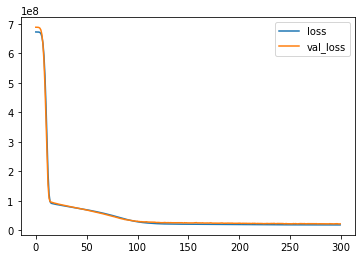

In [47]:
kayipVerisi.plot() 
#kayıp giderek azılıyor.
#loss ile validation loss birlikte azalıyor başarılı!dd

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
tahminDizisi = model.predict(x_test)

In [50]:
tahminDizisi   # belli fiyatlar dönüyor

array([[20519.777],
       [22635.469],
       [24788.396],
       ...,
       [25041.16 ],
       [11547.526],
       [24275.904]], dtype=float32)

In [51]:
mean_absolute_error(y_test,tahminDizisi) # aradaki fark

3342.954543695408

In [52]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


NOT: Ortalama 24.000 pound'a satılan bir arabada 3200 poundluk fark oluşuyor.
Buradan hareketle 3200/24000= 0,133 yani %13 'lük bir sapma değeri kaydetmiş oluruz. Değer bizim için kabul edilebilir değilse tekrar veri temizlemeye dönülebilir ya da model eğitimi esnasında parametreler(epochs, nöron dayısı,katman sayısı, batchsize vb.) değiştirilebilir.

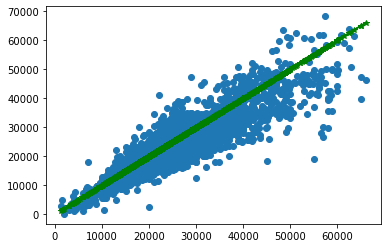

In [53]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

//Denemek için çalışmaya dahil değil.

In [54]:
dataFrame.iloc[2] # 3.elemana bakyoruz.

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [55]:
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [56]:
type(yeniArabaSeries)

pandas.core.series.Series

In [57]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [58]:
model.predict(yeniArabaSeries)


array([[62202.16]], dtype=float32)

 ## Classification

In [59]:
import pandas as pd
import numpy as np

In [60]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [61]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [62]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [63]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [64]:
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:xlabel='Type', ylabel='count'>

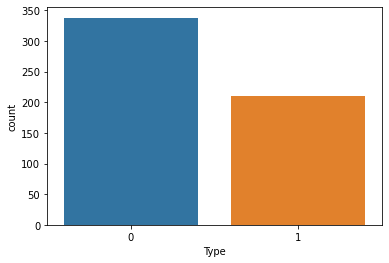

In [65]:
sbn.countplot(x="Type", data = dataFrame)

<AxesSubplot:>

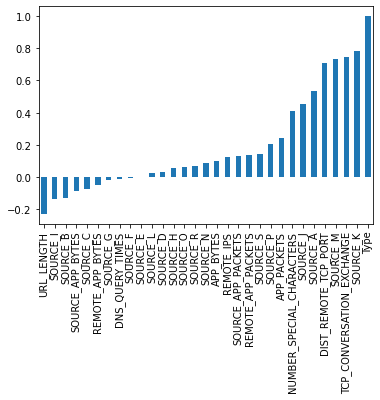

In [66]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [67]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type", axis=1).values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(x_train)

MinMaxScaler()

In [73]:
x_train = scaler.transform(x_train)

In [74]:
x_test = scaler.transform(x_test)

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout   #over- fitting için
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
x_train.shape

(383, 30)

In [77]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) #son katmanda sigmoid aktivasyonu kullanıldı.

model.compile(loss="binary_crossentropy", optimizer= "adam")



In [78]:
model.fit(x = x_train, y = y_train, epochs=700 ,validation_data = (x_test,y_test),verbose=1)  #validation_data: doğrulama verisi

Epoch 1/700
12/12 [==============================] - 1s 22ms/step - loss: 0.6870 - val_loss: 0.6926
Epoch 2/700
12/12 [==============================] - 0s 12ms/step - loss: 0.6776 - val_loss: 0.6901
Epoch 3/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6696 - val_loss: 0.6878
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6579 - val_loss: 0.6788
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6421 - val_loss: 0.6681
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6193 - val_loss: 0.6461
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5865 - val_loss: 0.6077
Epoch 8/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5429 - val_loss: 0.5633
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.4913 - val_loss: 0.5201
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.4385 - val_loss: 0.4686
Epoch 

Epoch 83/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0616 - val_loss: 0.2376
Epoch 84/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0616 - val_loss: 0.2428
Epoch 85/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0616 - val_loss: 0.2409
Epoch 86/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0614 - val_loss: 0.2391
Epoch 87/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0607 - val_loss: 0.2433
Epoch 88/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0642 - val_loss: 0.2384
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0610 - val_loss: 0.2385
Epoch 90/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0587 - val_loss: 0.2378
Epoch 91/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0585 - val_loss: 0.2383
Epoch 92/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0603 - val_loss: 0.2366


12/12 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.2791
Epoch 246/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0220 - val_loss: 0.2782
Epoch 247/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.2825
Epoch 248/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.2753
Epoch 249/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.2801
Epoch 250/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0204 - val_loss: 0.2813
Epoch 251/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.2829
Epoch 252/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.2823
Epoch 253/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0200 - val_loss: 0.2875
Epoch 254/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.2906
Epoc

12/12 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.4187
Epoch 408/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.4347
Epoch 409/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.4234
Epoch 410/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.4190
Epoch 411/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0089 - val_loss: 0.4544
Epoch 412/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.4264
Epoch 413/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.4238
Epoch 414/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.4314
Epoch 415/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.4362
Epoch 416/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.4360
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.5624
Epoch 570/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.5613
Epoch 571/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.5668
Epoch 572/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.5734
Epoch 573/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.5713
Epoch 574/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.5752
Epoch 575/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.5786
Epoch 576/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.5724
Epoch 577/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.5762
Epoch 578/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.5939
Epoc

In [79]:
model.history.history

{'loss': [0.6870394349098206,
  0.6775510311126709,
  0.6696283221244812,
  0.6578898429870605,
  0.6421250104904175,
  0.6193332076072693,
  0.5864923000335693,
  0.5428568124771118,
  0.49129244685173035,
  0.4384862184524536,
  0.3894805908203125,
  0.34881046414375305,
  0.3095948398113251,
  0.27879759669303894,
  0.2527017891407013,
  0.2265990674495697,
  0.2092563658952713,
  0.19854120910167694,
  0.18344922363758087,
  0.17203064262866974,
  0.1652223914861679,
  0.16059312224388123,
  0.15065495669841766,
  0.1507078856229782,
  0.141550213098526,
  0.1360054910182953,
  0.132194384932518,
  0.13540148735046387,
  0.12821601331233978,
  0.12092526257038116,
  0.116293765604496,
  0.1124105155467987,
  0.109785296022892,
  0.10742486268281937,
  0.107274129986763,
  0.10382505506277084,
  0.10172148048877716,
  0.1001124158501625,
  0.10039136558771133,
  0.10147957503795624,
  0.09919912368059158,
  0.09629318118095398,
  0.0957370325922966,
  0.09361539781093597,
  0.093962

In [80]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

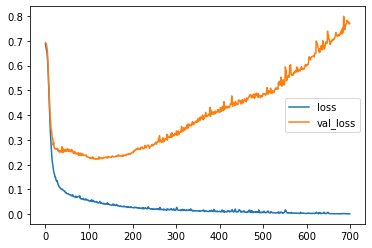

In [81]:
modelKaybi.plot()  # over-fitting sorunu:epochs çok olursa

In [82]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) #son katmanda sigmoid

model.compile(loss="binary_crossentropy", optimizer= "adam")



In [83]:
earlyStopping = EarlyStopping(monitor="val_loss", mode= "min", verbose=1,patience =25)

In [84]:
model.fit(x=x_train,y= y_train, epochs=700,validation_data=(x_test,y_test), verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 18ms/step - loss: 0.6864 - val_loss: 0.6783
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6703 - val_loss: 0.6680
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6522 - val_loss: 0.6557
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6367
Epoch 5/700
12/12 [==============================] - 0s 13ms/step - loss: 0.6015 - val_loss: 0.6108
Epoch 6/700
12/12 [==============================] - 0s 11ms/step - loss: 0.5653 - val_loss: 0.5775
Epoch 7/700
12/12 [==============================] - 0s 11ms/step - loss: 0.5233 - val_loss: 0.5413
Epoch 8/700
12/12 [==============================] - 0s 11ms/step - loss: 0.4757 - val_loss: 0.5002
Epoch 9/700
12/12 [==============================] - 0s 11ms/step - loss: 0.4244 - val_loss: 0.4676
Epoch 10/700
12/12 [==============================] - 0s 11ms/step - loss: 0.3721 - val_loss: 0.4232
Ep

Epoch 83/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0497 - val_loss: 0.2171
Epoch 84/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0513 - val_loss: 0.2166
Epoch 85/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0547 - val_loss: 0.2181
Epoch 86/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0486 - val_loss: 0.2181
Epoch 87/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0470 - val_loss: 0.2178
Epoch 88/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0475 - val_loss: 0.2177
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0478 - val_loss: 0.2147
Epoch 90/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0556 - val_loss: 0.2208
Epoch 90: early stopping


In [85]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

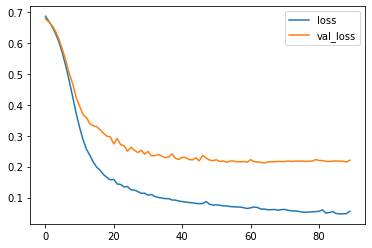

In [86]:
modelKaybi.plot()

In [87]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.6))



model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1, activation="sigmoid")) #son katmanda sigmoid


model.compile(loss="binary_crossentropy", optimizer= "adam")



In [88]:
model.fit(x=x_train,y= y_train, epochs=700,validation_data=(x_test,y_test), verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 17ms/step - loss: 0.7067 - val_loss: 0.6911
Epoch 2/700
12/12 [==============================] - 0s 9ms/step - loss: 0.7068 - val_loss: 0.6874
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6905 - val_loss: 0.6845
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6752 - val_loss: 0.6829
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6865 - val_loss: 0.6809
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6759 - val_loss: 0.6791
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6780 - val_loss: 0.6761
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6785 - val_loss: 0.6734
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6756 - val_loss: 0.6711
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6531 - val_loss: 0.6683
Epoch 11

12/12 [==============================] - 0s 7ms/step - loss: 0.2569 - val_loss: 0.2971
Epoch 84/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2995 - val_loss: 0.3073
Epoch 85/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2608 - val_loss: 0.3011
Epoch 86/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2989 - val_loss: 0.2989
Epoch 87/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2783 - val_loss: 0.2972
Epoch 88/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2574 - val_loss: 0.2973
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2705 - val_loss: 0.3015
Epoch 90/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2491 - val_loss: 0.2987
Epoch 91/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3117 - val_loss: 0.2947
Epoch 92/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2482 - val_loss: 0.3004
Epoch 93/700


In [89]:
kayipDf = pd.DataFrame(model.history.history)

<AxesSubplot:>

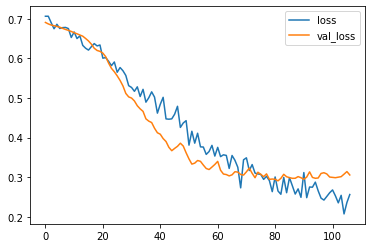

In [90]:
kayipDf.plot()

In [91]:
tahminlerimiz = (model.predict(x_test) > 0.5).astype("int32")

In [92]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

#confusion_matrix: accuracy ne kadar doğru?

In [94]:
print(classification_report(y_test, tahminlerimiz))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.90      0.85      0.88        74

    accuracy                           0.89       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.89      0.89       165

